In [22]:
import pandas as pd
df = pd.read_csv('/content/data.csv')

In [23]:
print('Shape:', df.shape, '/n')
df.head()

Shape: (3705, 18) /n


,name,country,date,trip_verified,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_service,food_beverages,entertainment,ground_service,wifi,value_for_money,recommended
0,F Orlandino,United Kingdom,2023-12-03,Trip Verified,1.0,NaN,Family Leisure,Economy Class,Palma de Mallorca to Gatwick,December 2023,1.0,1.0,NaN,NaN,1.0,NaN,1,no
1,A Gittens,United Kingdom,2023-11-30,Trip Verified,5.0,Boeing 787-9,Solo Leisure,Economy Class,London to Johannesburg,November 2023,2.0,3.0,3.0,1.0,4.0,1.0,3,yes
2,Bert Vissers,Switzerland,2023-11-26,Trip Verified,1.0,NaN,Family Leisure,Economy Class,Zürich to Tokyo Haneda via London,July 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no
3,E Smyth,United Kingdom,2023-11-23,Trip Verified,9.0,A380,Couple Leisure,First Class,London to Miami,November 2023,5.0,5.0,5.0,5.0,4.0,2.0,4,yes
4,L Keele,Germany,2023-11-19,Trip Verified,1.0,NaN,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,NaN,NaN,1.0,NaN,1,no


In [24]:
df.describe()

,rating,seat_comfort,cabin_service,food_beverages,entertainment,ground_service,wifi,value_for_money
count,3698.000000,3589.000000,3578.000000,3319.000000,2564.000000,2859.000000,612.000000,3705.000000
mean,4.716333,2.868208,3.247624,2.705032,2.637676,2.783841,1.921569,2.682591
std,3.169345,1.360235,1.489935,1.436859,1.403468,1.457157,1.350417,1.469886
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000
75%,8.000000,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


No     2210
Yes    1495
Name: recommended, dtype: int64


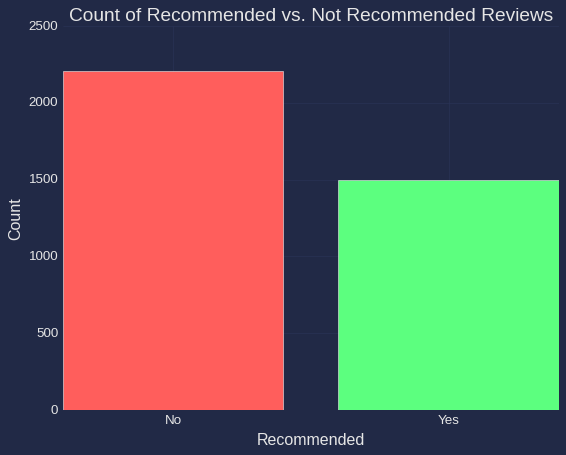

In [29]:
import matplotlib.pyplot as plt

recommended_counts = df['recommended'].str.capitalize().value_counts()
print(recommended_counts)

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# Bar chart-To visualize type of recommendations
plt.figure(figsize=(8, 6))
plt.bar(recommended_counts.index, recommended_counts.values, color=['#ff5e5c', '#5cff7f'])
plt.title('Count of Recommended vs. Not Recommended Reviews')
plt.xlabel('Recommended')
plt.ylabel('Count')
plt.show()

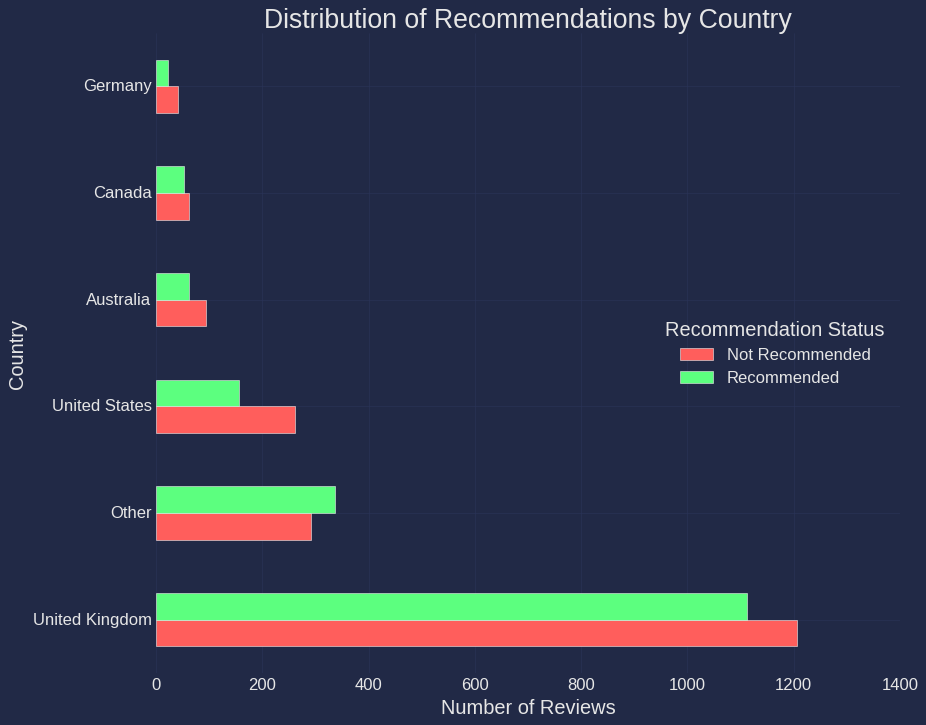

In [45]:
# Convert 'Yes' and 'No' to 1 and 0
df['recommended'] = df['recommended'].map({'Yes': 1, 'No': 0})

# Convert 'rating' column to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Create a new column 'combined_country' to represent the combined countries
df['combined_country'] = df['country'].apply(lambda x: x if x in ['United States', 'United Kingdom', 'Canada', 'Australia', 'Germany'] else 'Other')

# Update 'recommended' column based on 'rating'
df['recommended'] = df.apply(lambda row: 'Yes' if row['rating'] >= 5
                             and pd.isna(row['recommended'])
                             else 'No' if row['rating'] < 5
                             and pd.isna(row['recommended'])
                             else row['recommended'], axis=1)

# Create recommendation counts for the combined countries
recommendation_counts = df.groupby(['combined_country', 'recommended']).size().unstack().fillna(0)

# Order countries by highest review count
order = recommendation_counts.sum(axis=1).sort_values(ascending=False).index
recommendation_counts = recommendation_counts.loc[order]

# Plot a horizontal bar chart with red and green bars
ax = recommendation_counts.plot(kind='barh', color=['#ff5e5c', '#5cff7f'], figsize=(12, 10))

# Set labels and title
ax.set_xlabel('Number of Reviews', fontsize=18)
ax.set_ylabel('Country', fontsize=18)
ax.set_title('Distribution of Recommendations by Country', fontsize=24)

# Set the legend title and labels, move legend to bottom left
legend_labels = ['Not Recommended', 'Recommended']
legend_title = 'Recommendation Status'
plt.legend(legend_labels, title=legend_title, loc='center right', title_fontsize=18, fontsize=15)

# Increase font size of tick labels
ax.tick_params(axis='both', labelsize=15)

# Show the plot
plt.show()

# Drop the temporary 'combined_country' column to not affect the original DataFrame
df = df.drop('combined_country', axis=1)
